# ...



In [2]:
from keras_v2 import *
from keras.models import load_model


In [3]:
print("loading")
ds = AnomalyDataset(filter_ips=False)
X, y = ds.train_test_ds()
    
print('done.')    

loading


In [5]:
custom_objects={'roc_auc_score_fn': roc_auc_score_fn}
model = load_model('../tmp/weights.hdf5', custom_objects=custom_objects)


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
for k, v in X.items():
    print('x:', k, v.shape)
print('y: ', y.shape)

x: app (242441395,)
x: channel (242441395,)
x: device (242441395,)
x: ip (242441395,)
x: os (242441395,)
x: hour (242441395,)
y:  (242441395,)


In [13]:
preds = model.predict(X, verbose=1, batch_size=4096)

242441395/242441395 [==============================] - 195s 1us/step


In [14]:
preds.shape

(242441395, 1)

In [16]:
np.sum(preds)

942909.4

In [18]:
np.sum(y)


456846

In [7]:
from sklearn.metrics import roc_auc_score

In [19]:
roc_auc_score(y, preds)

0.9036369275422008

In [21]:
with open(os.path.join(CACHE, 'preds.pkl'), 'wb') as f:
    pickle.dump(preds, f)

In [22]:
import seaborn as sns


In [23]:
import matplotlib.pyplot as plt
plt.show()

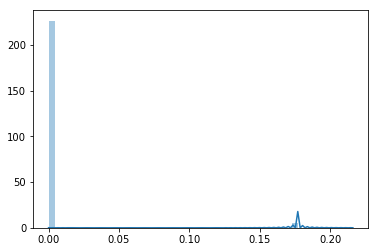

In [24]:
sns.distplot(preds)